## UAS VISUALIZATION

### Connect to local data

In [2]:
!pip install pymysql

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   --------------------------- ------------ 30.7/45.0 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 315.7 kB/s eta 0:00:00


In [3]:
import pymysql
db = pymysql.connect(host = 'localhost',
                     user = 'root',
                     password = '',
                     db = 'adventureworks'
                     )

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

### Engine

In [5]:
import mysql.connector
from sqlalchemy import create_engine

engine = create_engine("mysql+mysqlconnector://root:@localhost/adventureworks")

### Read Data

In [7]:
# dimensi
dimtime_df = pd.read_sql("SELECT * FROM dimtime", engine)
dimcustomer_df = pd.read_sql("SELECT * FROM dimcustomer", engine)
dimproduct_df = pd.read_sql("SELECT * FROM dimproduct", engine)
dimproductcategory_df = pd.read_sql("SELECT * FROM dimproductcategory", engine)
dimproductsubcategory_df = pd.read_sql("SELECT * FROM dimproductsubcategory", engine)

# fakta
factintsales = pd.read_sql("SELECT * FROM factinternetsales", engine)

###Visualisasi

#### Comparison
Menggunakan bar chart

C:\Users\dev\AppData\Local\Temp\ipykernel_11516\4042701314.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tren_penjualan, x='CalendarYear', y='SalesAmount', palette=colors)


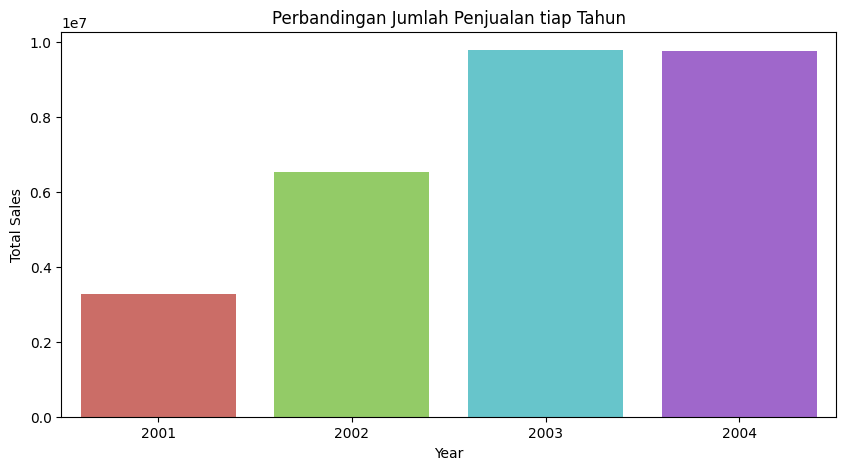

In [8]:
tren_penjualan = factintsales.merge(dimtime_df, left_on='OrderDateKey', right_on='TimeKey')
tren_penjualan = tren_penjualan.groupby('CalendarYear').agg({'SalesAmount': 'sum'}).reset_index()

colors = sns.color_palette("hls", len(tren_penjualan))

plt.figure(figsize=(10, 5))
sns.barplot(data=tren_penjualan, x='CalendarYear', y='SalesAmount', palette=colors)
plt.title('Perbandingan Jumlah Penjualan tiap Tahun')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

#### Relationship
Menggunakan scatter plot

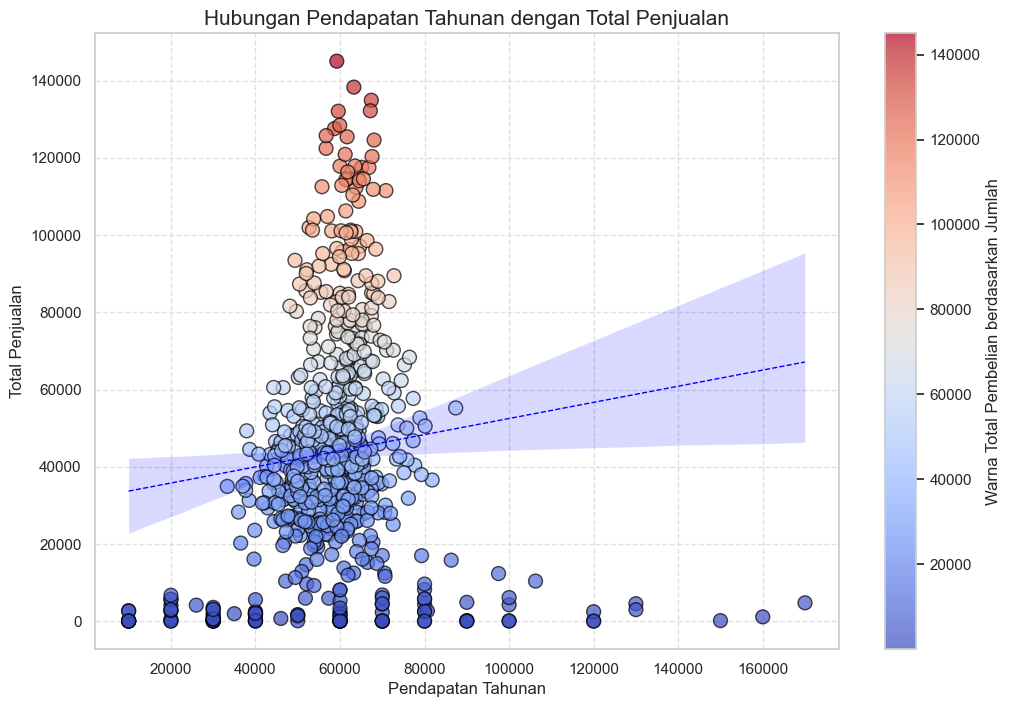

In [9]:
customer_buy = factintsales.merge(dimcustomer_df, left_on='CustomerKey', right_on='CustomerKey')
customer_buy = customer_buy.groupby('FirstName').agg({'SalesAmount': 'sum','YearlyIncome': 'mean',}).reset_index()

colors = customer_buy['SalesAmount']
norm = plt.Normalize(colors.min(), colors.max())
cmap = plt.cm.coolwarm
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
scatter = plt.scatter(customer_buy['YearlyIncome'], customer_buy['SalesAmount'], c=colors, cmap=cmap, edgecolor='black', alpha=0.7, s=100)
cbar = plt.colorbar(scatter)
cbar.set_label('Warna Total Pembelian berdasarkan Jumlah')
sns.regplot(x='YearlyIncome', y='SalesAmount', data=customer_buy, scatter=False, color='blue', line_kws={"linewidth":1, "linestyle":"--"})
plt.title('Hubungan Pendapatan Tahunan dengan Total Penjualan', fontsize=15)
plt.xlabel('Pendapatan Tahunan', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Composition
Menggunakan pie chart dan bar chart

C:\Users\dev\AppData\Local\Temp\ipykernel_11516\539390461.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SalesAmount', y='EnglishProductSubcategoryName', data=penjualan_subkategori.head(10), ax=ax[1], palette=colors)


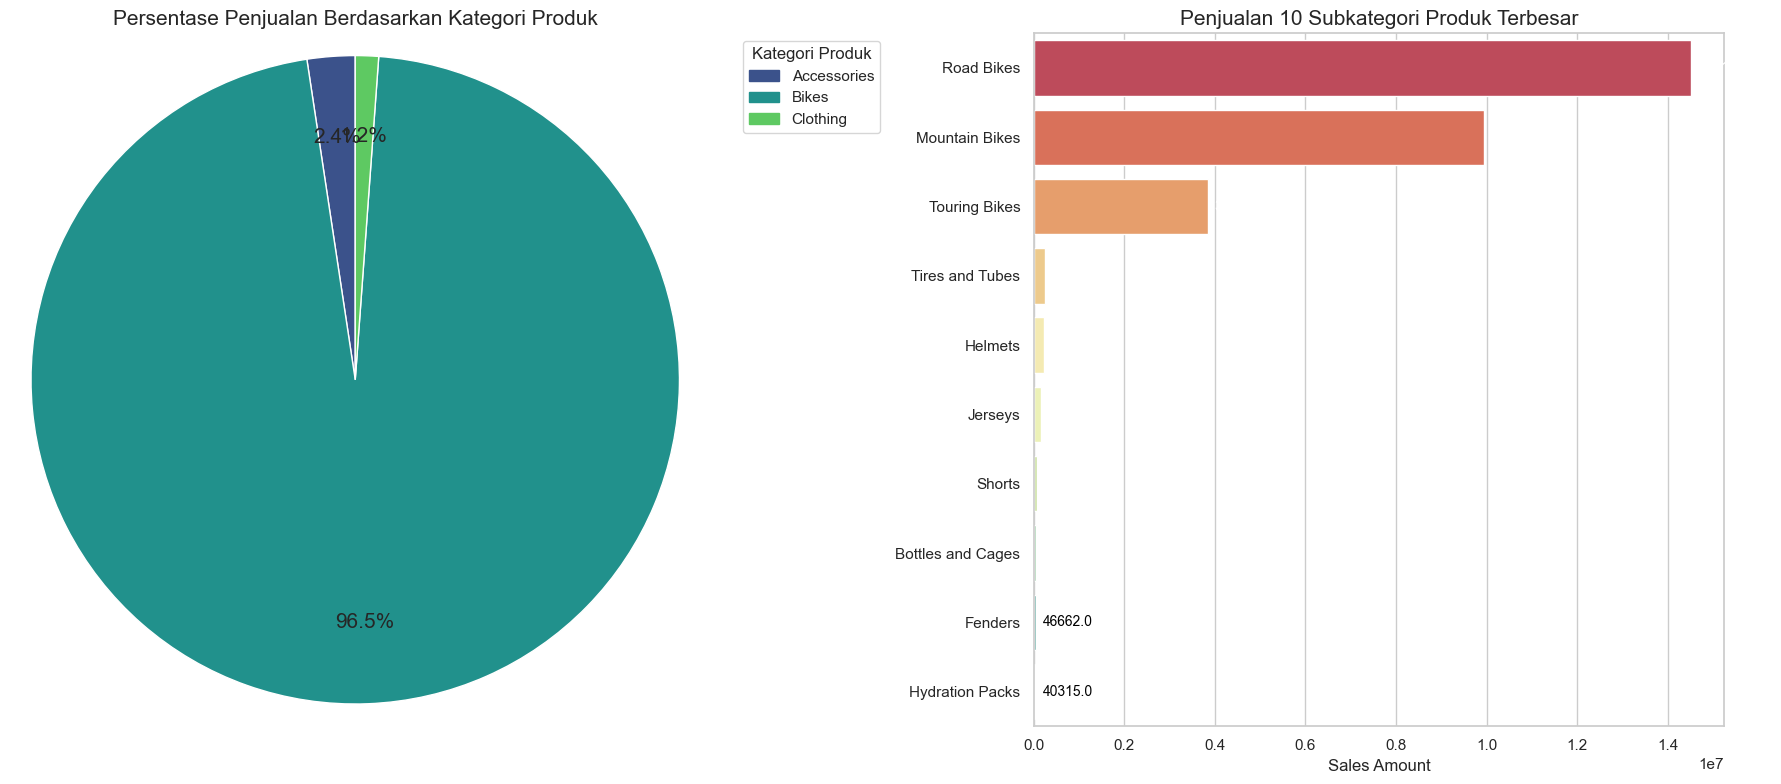

In [10]:
penjualan_product = factintsales.merge(dimproduct_df, left_on='ProductKey', right_on='ProductKey')
penjualan_subkategori = penjualan_product.merge(dimproductsubcategory_df, left_on='ProductSubcategoryKey', right_on='ProductSubcategoryKey')
penjualan_kategori = penjualan_subkategori.merge(dimproductcategory_df, left_on='ProductCategoryKey', right_on='ProductCategoryKey')

penjualan_kategori = penjualan_kategori.groupby('EnglishProductCategoryName').agg({'SalesAmount': 'sum'}).reset_index()
penjualan_subkategori = penjualan_subkategori.groupby('EnglishProductSubcategoryName').agg({'SalesAmount': 'sum'}).reset_index()
penjualan_subkategori = penjualan_subkategori.sort_values('SalesAmount', ascending=False).head(10)

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
colors = sns.color_palette('viridis', len(penjualan_kategori))
wedges, texts, autotexts = ax[0].pie(penjualan_kategori['SalesAmount'], labels=None, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.75, labeldistance=0,
                                     textprops={'fontsize': 15})
legend_labels = penjualan_kategori['EnglishProductCategoryName']
legend_colors = colors
legend_handles = [patches.Patch(color=color) for color in legend_colors]
ax[0].legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1), title='Kategori Produk')
ax[0].set_title('Persentase Penjualan Berdasarkan Kategori Produk', fontsize=15)
ax[0].axis('equal')

# Bar Chart
colors = sns.color_palette('Spectral', len(penjualan_subkategori))
sns.barplot(x='SalesAmount', y='EnglishProductSubcategoryName', data=penjualan_subkategori.head(10), ax=ax[1], palette=colors)
ax[1].set_title('Penjualan 10 Subkategori Produk Terbesar', fontsize=15)
ax[1].set_xlabel('Sales Amount', fontsize=12)
ax[1].set_ylabel('')
for p, label in zip(ax[1].patches, penjualan_subkategori['SalesAmount']):
    text_color = 'white' if p.get_facecolor()[0] > 0.5 else 'black'
    ax[1].annotate(f'{label:.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='left', va='center', fontsize=10, color=text_color, xytext=(5, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

#### Distribution
Menggunakan histogram column

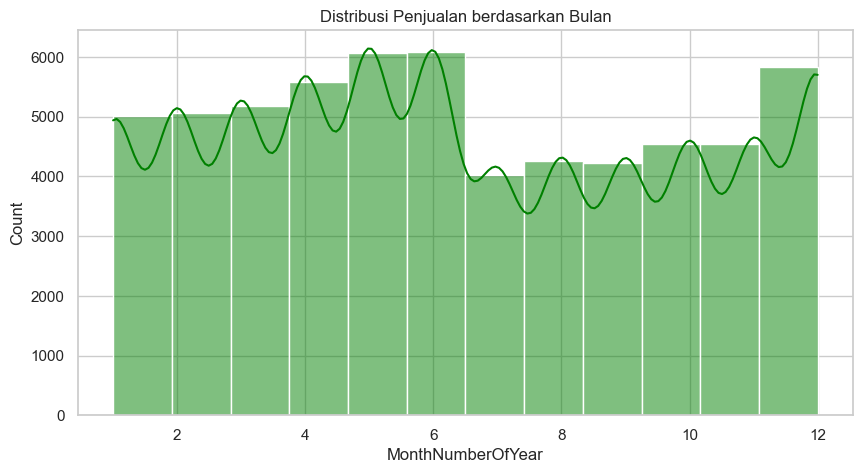

In [11]:
tren_penjualan = factintsales.merge(dimtime_df, left_on='OrderDateKey', right_on='TimeKey')

plt.figure(figsize=(10, 5))
sns.histplot(data=tren_penjualan, x='MonthNumberOfYear', bins=12, kde=True, color='green')
plt.title('Distribusi Penjualan berdasarkan Bulan')
plt.show()